In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
df = pd.read_csv('lung_cancer.csv')
df.head()

,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1


In [4]:
df.shape

(59, 7)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


In [6]:
df.describe()

,Age,Smokes,AreaQ,Alkhol,Result
count,59.000000,59.000000,59.000000,59.000000,59.000000
mean,42.627119,15.067797,5.203390,3.237288,0.474576
std,16.235230,7.984607,2.461984,2.380517,0.503640
min,18.000000,0.000000,1.000000,0.000000,0.000000
25%,29.000000,10.000000,3.000000,1.000000,0.000000
50%,39.000000,15.000000,5.000000,3.000000,0.000000
75%,55.000000,20.000000,7.500000,5.000000,1.000000
max,77.000000,34.000000,10.000000,8.000000,1.000000


In [8]:
df['Result'].value_counts()

0    31
1    28
Name: Result, dtype: int64

0 = The person has no cancer, 
1= The person has cancer

In [9]:
no_cancer = df[df.Result==0]
cancer = df[df.Result==1]

In [20]:
# separating data for analysis

print('NON Cancer: ',no_cancer.shape)
print('Cancer: ',cancer.shape)

NON Cancer:  (31, 7)
Cancer:  (28, 7)


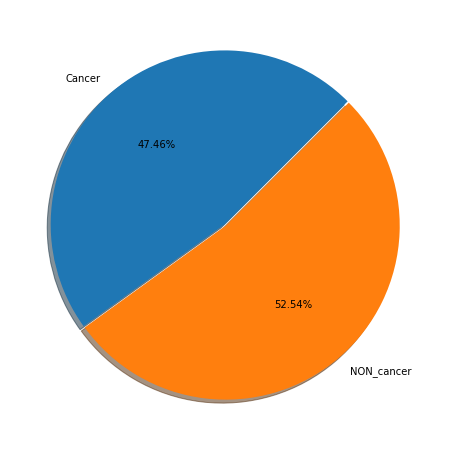

In [23]:
%matplotlib inline
fig, ax1= plt.subplots(figsize=(8,8))
label = ['Cancer','NON_cancer']
value=[28,31]
ax1.pie(x=value, labels=label, autopct='%.2f%%', shadow=True, startangle=45, explode=[0,.01])
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_7756/3002631574.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(cancer.Age, cancer.Smokes, color="Red", Label='cancer(1)')
C:\Users\User\AppData\Local\Temp/ipykernel_7756/3002631574.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(no_cancer.Age, no_cancer.Smokes, color="Green", Label='Non_cancer(0)')


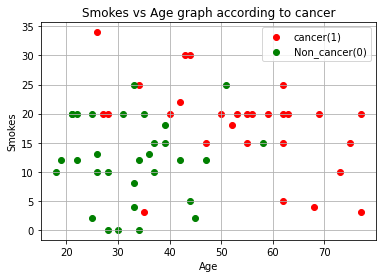

In [18]:
plt.scatter(cancer.Age, cancer.Smokes, color="Red", Label='cancer(1)')
plt.scatter(no_cancer.Age, no_cancer.Smokes, color="Green", Label='Non_cancer(0)')
plt.xlabel("Age")
plt.ylabel("Smokes")
plt.legend()
plt.grid()
plt.title("Smokes vs Age graph according to cancer")
plt.show()

C:\Users\User\AppData\Local\Temp/ipykernel_7756/314123760.py:1: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(cancer.Age, cancer.Alkhol, color="Red", Label='cancer(1)')
C:\Users\User\AppData\Local\Temp/ipykernel_7756/314123760.py:2: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.scatter(no_cancer.Age, no_cancer.Alkhol, color="Green", Label='Non_cancer(0)')


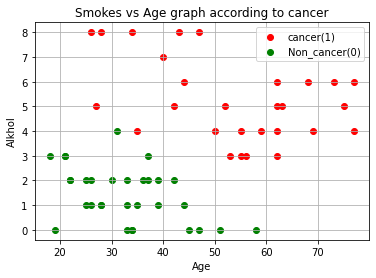

In [19]:
plt.scatter(cancer.Age, cancer.Alkhol, color="Red", Label='cancer(1)')
plt.scatter(no_cancer.Age, no_cancer.Alkhol, color="Green", Label='Non_cancer(0)')
plt.xlabel("Age")
plt.ylabel("Alkhol")
plt.legend()
plt.grid()
plt.title("Smokes vs Age graph according to cancer")
plt.show()

In [27]:
# spliting dataset for training
X= df.iloc[:,3:5]
Y= df.iloc[:,6]

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, stratify=Y, random_state=2)

In [32]:
print("Total: ",X.shape)
print("For Training: ",X_train.shape)
print("For Testing: ",X_test.shape)

Total:  (59, 2)
For Training:  (47, 2)
For Testing:  (12, 2)


In [35]:
# model training using KNN

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [36]:
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [40]:
y_predict = model.predict(X_test)
print("Predict Result: ",y_predict)

Predict Result:  [1 1 0 0 1 0 1 1 0 0 1 1]


In [41]:
# accuracy score for training data and testing data
X_train_prediction=model.predict(X_train)
X_training_accuracy=accuracy_score(X_train_prediction,Y_train)

X_test_prediction=model.predict(X_test)
X_testing_accuracy=accuracy_score(X_test_prediction,Y_test)

In [42]:
print('Accuracy score for training data: ',X_training_accuracy)
print('Accuracy score for testing data: ',X_testing_accuracy)

Accuracy score for training data:  0.8936170212765957
Accuracy score for testing data:  0.9166666666666666


In [43]:
# model training using Decision tree Classifier

from sklearn.tree import DecisionTreeClassifier
dclf = DecisionTreeClassifier()
dclf.fit(X_train,Y_train)

DecisionTreeClassifier()

In [44]:
y_predict = dclf.predict(X_test)
print("Predict Result: ",y_predict)

Predict Result:  [0 1 0 0 1 0 0 1 0 1 1 1]


In [46]:
# accuracy score for training data and testing data
X_train_prediction=dclf.predict(X_train)
X_training_accuracy=accuracy_score(X_train_prediction,Y_train)

X_test_prediction=dclf.predict(X_test)
X_testing_accuracy=accuracy_score(X_test_prediction,Y_test)

In [47]:
print('Accuracy score for training data: ',X_training_accuracy)
print('Accuracy score for testing data: ',X_testing_accuracy)

Accuracy score for training data:  0.9148936170212766
Accuracy score for testing data:  0.8333333333333334
